In [ ]:
#How can industries be grouped based on the types of benefits and flexible work arrangements they commonly offer?

In [1]:
import pandas as pd
import numpy as np

In [3]:
import os

In [5]:
os.getcwd()

'C:\\Users\\Tobias Ortiz\\OneDrive\\Documents\\IE University\\advanced-data-analytics\\group project'

In [7]:
pd.read_csv('job_industries.csv')

,job_id,industry_id
0,3884428798,82
1,3887473071,48
2,3887465684,41
3,3887467939,82
4,3887467939,80
...,...,...
164803,3902882321,104
164804,3902879720,27
164805,3902876855,80
164806,3902878689,116


In [9]:
pd.read_csv('benefits.csv')

,job_id,inferred,type
0,3887473071,0,Medical insurance
1,3887473071,0,Vision insurance
2,3887473071,0,Dental insurance
3,3887473071,0,401(k)
4,3887473071,0,Student loan assistance
...,...,...,...
67938,3902878689,0,Dental insurance
67939,3902878689,0,Pension plan
67940,3902878689,0,Tuition assistance
67941,3902878689,0,Disability insurance


In [11]:
industries = pd.read_csv('job_industries.csv')

In [13]:
benefits = pd.read_csv('benefits.csv')

In [15]:
merge = pd.merge(industries, benefits, on='job_id', how='inner')

In [19]:
merge

,job_id,industry_id,inferred,type
0,3887473071,48,0,Medical insurance
1,3887473071,48,0,Vision insurance
2,3887473071,48,0,Dental insurance
3,3887473071,48,0,401(k)
4,3887473071,48,0,Student loan assistance
...,...,...,...,...
94405,3902878689,116,0,Dental insurance
94406,3902878689,116,0,Pension plan
94407,3902878689,116,0,Tuition assistance
94408,3902878689,116,0,Disability insurance


In [21]:
industry_benefits = merge.groupby('industry_id')['type'].value_counts().unstack(fill_value=0)

In [23]:
industry_benefits

type,401(k),Child care support,Commuter benefits,Dental insurance,Disability insurance,Medical insurance,Paid maternity leave,Paid paternity leave,Pension plan,Student loan assistance,Tuition assistance,Vision insurance
industry_id,,,,,,,,,,,,
1,298,2,27,69,252,233,19,18,6,5,56,105
3,50,0,7,21,21,21,7,0,0,0,7,32
4,820,1,100,253,223,314,69,76,13,5,28,321
5,11,0,2,3,1,11,1,0,0,0,0,3
6,212,1,28,79,78,98,11,12,4,2,7,115
...,...,...,...,...,...,...,...,...,...,...,...,...
3249,4,0,1,5,3,5,3,2,1,0,3,5
3250,6,0,0,8,3,8,3,3,0,0,2,8
3251,2,0,0,2,1,2,2,2,0,0,0,2


In [ ]:
from sklearn.cluster import KMeans

In [101]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=20)
kmeans.fit(industry_benefits)

C:\Users\Tobias Ortiz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=6, n_init=20, random_state=42)

In [103]:
industry_benefits['Cluster'] = kmeans.labels_

In [105]:
kmeans.labels_

array([4, 0, 2, 0, 4, 0, 2, 2, 4, 2, 2, 4, 5, 2, 4, 2, 0, 2, 0, 0, 0, 4,
       0, 2, 0, 1, 4, 0, 0, 2, 4, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 4,
       4, 2, 3, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 4,
       0, 4, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4,
       4, 0, 4, 0, 3, 0, 4, 0, 4, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 2, 0, 4, 0, 0, 4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0,
       4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [107]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[1.25543478e+01, 2.64492754e-01, 1.48913043e+00, 5.81159420e+00,
        4.66304348e+00, 7.56521739e+00, 1.69202899e+00, 1.40217391e+00,
        6.95652174e-01, 3.26086957e-01, 1.97826087e+00, 7.39492754e+00,
        6.66133815e-16],
       [2.30950000e+03, 8.00000000e+00, 1.90000000e+02, 3.44000000e+02,
        6.38000000e+02, 5.01000000e+02, 1.24000000e+02, 7.35000000e+01,
        1.70000000e+01, 8.00000000e+00, 4.80000000e+01, 5.38000000e+02,
        3.00000000e+00],
       [5.06823529e+02, 7.35294118e+00, 6.02352941e+01, 1.64117647e+02,
        1.60000000e+02, 2.02411765e+02, 4.85882353e+01, 4.14705882e+01,
        1.60000000e+01, 7.17647059e+00, 5.45294118e+01, 2.16941176e+02,
        3.29411765e+00],
       [1.16466667e+03, 2.70000000e+01, 1.69666667e+02, 4.09000000e+02,
        4.51666667e+02, 5.13333333e+02, 1.09000000e+02, 9.90000000e+01,
        6.16666667e+01, 2.56666667e+01, 1.26666667e+02, 5.08000000e+02,
        2.00000000e+00],
       [1.77391304e+02, 3.52173913e+

In [109]:
import matplotlib.pyplot as plt

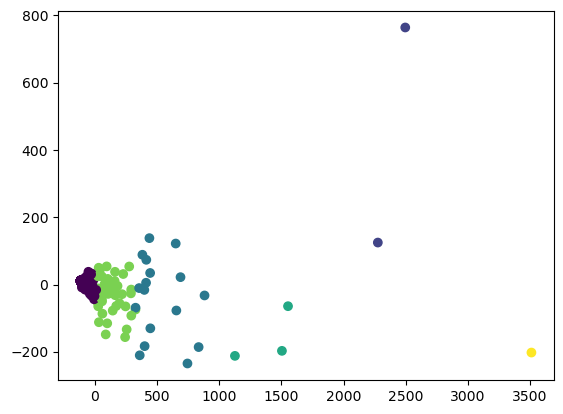

In [111]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)  
reduced_data = pca.fit_transform(industry_benefits)  
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_)  
plt.show()

In [113]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(industry_benefits, kmeans.labels_)  
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7536750803165866


In [115]:
from collections import Counter
from sklearn.cluster import KMeans
cluster_counts = Counter(kmeans.labels_)
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} observations")

Cluster 4: 46 observations
Cluster 0: 276 observations
Cluster 2: 17 observations
Cluster 5: 1 observations
Cluster 1: 2 observations
Cluster 3: 3 observations
